**Value as the response (i.e., a regression problem)**

- Value (C): Current option value

- S: Current asset value

- K: Strike price of option

- r: Annual interest rate

- tau: Time to maturity (in years)

- BS: The Black-Scholes formula was applied to this data (using some 𝜎) to get C_pred.
and If an option has C_pred – C > 0, i.e., the prediction over estimated the option value, we associate that option by (Over); otherwise, we associate that option with (Under).

In [1]:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
test = pd.read_csv('option_test_wolabel.csv')
train = pd.read_csv('option_train.csv')

In [4]:
train.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


In [5]:
#Data Cleaning

#identify missing value
df = train.copy()
df.isna().any()

#None missing value

Value    False
S        False
K        False
tau      False
r        False
BS       False
dtype: bool

In [6]:
df.describe()

,Value,S,K,tau,r
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,15.064384,440.901494,438.247024,0.201930,0.030235
std,14.035795,7.527497,23.396936,0.099712,0.000557
min,0.125000,425.472331,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.579723,440.000000,0.202381,0.030130
75%,25.744375,447.320414,455.000000,0.285714,0.030540
max,60.149367,455.880619,500.000000,0.392857,0.031880


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1680 non-null   float64
 1   S       1680 non-null   float64
 2   K       1680 non-null   int64  
 3   tau     1680 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 78.9+ KB


In [8]:
df = df.iloc[:, :-1]
df.head()

,Value,S,K,tau,r
0,21.670404,431.623898,420,0.341270,0.03013
1,0.125000,427.015526,465,0.166667,0.03126
2,20.691244,427.762336,415,0.265873,0.03116
3,1.035002,451.711658,460,0.063492,0.02972
4,39.553020,446.718974,410,0.166667,0.02962


In [9]:
#Separate training and test data

from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=0)

In [10]:
#Min-max normalized

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [11]:
df.iloc[:, 1:]

,S,K,tau,r
0,431.623898,420,0.341270,0.03013
1,427.015526,465,0.166667,0.03126
2,427.762336,415,0.265873,0.03116
3,451.711658,460,0.063492,0.02972
4,446.718974,410,0.166667,0.02962
...,...,...,...,...
1675,444.397163,475,0.273810,0.03034
1676,438.453825,410,0.301587,0.02972
1677,428.042219,390,0.170635,0.03188
1678,439.081203,480,0.293651,0.02962


In [12]:
test

,S,K,tau,r
0,431.618600,460,0.293651,0.03147
1,432.633296,420,0.182540,0.03147
2,432.633296,430,0.182540,0.03147
3,431.618600,415,0.293651,0.03147
4,434.772855,420,0.043651,0.03147
...,...,...,...,...
1115,440.067417,435,0.182540,0.02962
1116,439.081203,485,0.293651,0.02962
1117,439.081203,475,0.293651,0.02962
1118,442.490015,420,0.043651,0.02962


In [13]:
df.iloc[:, 0]

0       21.670404
1        0.125000
2       20.691244
3        1.035002
4       39.553020
          ...    
1675     1.470000
1676    34.927317
1677    41.127997
1678     0.440003
1679     0.410002
Name: Value, Length: 1680, dtype: float64

## Models

In [14]:
#Linear regression

from sklearn.linear_model import LinearRegression 

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

from sklearn.metrics import r2_score

y_pred = linear_model.predict(X_test)
test_r_sq = r2_score(y_test, y_pred)

y_pred_train = linear_model.predict(X_train)
train_r_sq = r2_score(y_train, y_pred_train)

print(f'In-sample r-squared is {train_r_sq}')
print(f'Out-of-sample r-squared is {test_r_sq}')

In-sample r-squared is 0.9112934458768568
Out-of-sample r-squared is 0.9136015223585076


In [39]:
#Linear regression norm

from sklearn.linear_model import LinearRegression 

linear_model1 = LinearRegression()
linear_model1.fit(X_train_norm, y_train)

#test accuracy

from sklearn.metrics import r2_score

y_pred = linear_model1.predict(X_test_norm)
r2_score(y_test, y_pred)

0.9136015223585093

In [16]:
# kNN

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 10)}, verbose=False).fit(X_train, y_train)

y_pred = knn_CV.predict(X_test)
test_r_sq = r2_score(y_test, y_pred)

y_pred_train = knn_CV.predict(X_train)
train_r_sq = r2_score(y_train, y_pred_train)

print(f'In-sample r-squared is {train_r_sq}')
print(f'Out-of-sample r-squared is {test_r_sq}')

In-sample r-squared is 0.9790118239714054
Out-of-sample r-squared is 0.9744462102406682


In [17]:
print(knn_CV.best_params_, '\n')

{'n_neighbors': 6} 



In [38]:
knn = KNeighborsRegressor()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 10)}, verbose=False).fit(X_train_norm, y_train)

y_pred = knn_CV.predict(X_test_norm)
r2_score(y_test, y_pred)


0.9750728612006854

In [19]:
print(knn_CV.best_params_, '\n')

{'n_neighbors': 4} 



In [20]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestRegressor()
param_grid = {'n_estimators': [30,40,50,60,70],'max_features': ['auto']}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, verbose=False)
random_forest_CV.fit(X_train, y_train)

y_pred = random_forest_CV.predict(X_test)
test_r_sq = r2_score(y_test, y_pred)

y_pred_train = random_forest_CV.predict(X_train)
train_r_sq = r2_score(y_train, y_pred_train)

print(f'In-sample r-squared is {train_r_sq}')
print(f'Out-of-sample r-squared is {test_r_sq}')

In-sample r-squared is 0.9992422042845889
Out-of-sample r-squared is 0.9965328442054363


In [21]:
1-0.999299167444877

0.0007008325551229877

In [22]:
print(random_forest_CV.best_params_, '\n')

{'max_features': 'auto', 'n_estimators': 30} 



In [37]:
random_forest = RandomForestRegressor()
param_grid = {'n_estimators': [30,40,50,60,70],'max_features': ['auto']}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, verbose=False)
random_forest_CV.fit(X_train_norm, y_train)

y_pred = random_forest_CV.predict(X_test_norm)
r2_score(y_test, y_pred)

0.9969150179555082

In [24]:
print(random_forest_CV.best_params_, '\n')

{'max_features': 'auto', 'n_estimators': 40} 



In [25]:
#XGBoost

import xgboost as xgb
from sklearn.metrics import accuracy_score

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

test_score = xgbr.score(X_test, y_test)
train_score = xgbr.score(X_train, y_train)

print(f'In-sample r-squared is {train_score}')
print(f'Out-of-sample r-squared is {test_score}')


In-sample r-squared is 0.9999109814553379
Out-of-sample r-squared is 0.9984608232980058


In [36]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_norm, y_train)

xgbr.score(X_test_norm, y_test)

0.9984606536356591

## Cross-Validation

#### K-fold cross validation

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

regression_model = LinearRegression()
error_model_1_cv = cross_val_score(regression_model,  X_train, y_train, cv = 10)

print(f'Regression : \tAccuracies of 10-folds: {error_model_1_cv}, \nMean r-squared : {np.mean(error_model_1_cv)}')

knn_model = KNeighborsRegressor()
error_model_2_cv = cross_val_score(knn_model,  X_train, y_train, cv = 10)

print(f'kNN : \tAccuracies of 10-folds: {error_model_2_cv}, \nMean r-squared : {np.mean(error_model_2_cv)}')

randomforest_model = RandomForestRegressor()
error_model_3_cv = cross_val_score(randomforest_model,  X_train, y_train, cv = 10)

print(f'Random Forest : Accuracies of 10-folds: {error_model_3_cv}, \nMean r-squared : {np.mean(error_model_3_cv)}')

Regression : 	Accuracies of 10-folds: [0.91610766 0.91125805 0.89571206 0.92668996 0.90429535 0.89641579
 0.89191627 0.92130014 0.92083035 0.9065227 ], 
Mean r-squared : 0.9091048328727217
kNN : 	Accuracies of 10-folds: [0.96556313 0.96928678 0.96909636 0.97524473 0.978896   0.96833465
 0.9423261  0.97866861 0.97358359 0.96289526], 
Mean r-squared : 0.9683895209337983
Random Forest : Accuracies of 10-folds: [0.99401972 0.99450598 0.99428003 0.99663453 0.99690262 0.99534611
 0.9921612  0.99664116 0.99468409 0.99634613], 
Mean r-squared : 0.9951521568313334


from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

error_model_1_cv = cross_val_score(regression_model,  X_train, y_train, cv = loo)

print(f'Regression : \tAccuracies of 10-folds: {error_model_1_cv}')



In [28]:
#output

prediction_xgb = list(xgbr.predict(test[:].values))
prediction_xgb

[-0.5118359,
 -1.1017398,
 -1.1017398,
 -0.5118359,
 -1.1282357,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -0.5118359,
 -1.1282357,
 -0.5118359,
 -1.1282357,
 -1.1017398,
 -1.1110454,
 -1.1017398,
 -1.1017398,
 -0.5118359,
 -1.1110454,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1110454,
 -0.5118359,
 -0.5118359,
 -1.1110454,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -0.5118359,
 -1.1017398,
 -1.1110454,
 -0.5118359,
 -1.1017398,
 -1.1017398,
 -1.1110454,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -1.1017398,
 -1.1017398,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1110454,
 -0.5118359,
 -1.1110454,
 -1.1110454,
 -1.1110454,
 -1.1017398,
 -1.1017398,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -0.5118359,
 -1.1110454,
 -1.1017398,
 -0.5118359,
 -0.5118359,
 -0.5118359,
 -1.1017398,
 -1.1111926,
 -1.1110454,
 -1.1110454,
 -0.69285625,
 -0.69285625,
 -1.1111926,
 -0.69285625,
 -1.11104

In [29]:
prediction_rf = list(random_forest_CV.predict(test[:].values))

prediction_rf

[0.29637633795,
 0.29625151564999996,
 0.29625151564999996,
 0.29637633795,
 0.30250153395000007,
 0.29637633795,
 0.29637633795,
 0.29637633795,
 0.29625151564999996,
 0.29637633795,
 0.30250153395000007,
 0.29637633795,
 0.30250153395000007,
 0.29625151564999996,
 0.30250153395000007,
 0.29625151564999996,
 0.29625151564999996,
 0.29637633795,
 0.30250153395000007,
 0.29637633795,
 0.29637633795,
 0.29637633795,
 0.30250153395000007,
 0.29637633795,
 0.29637633795,
 0.30250153395000007,
 0.29637633795,
 0.29637633795,
 0.29625151564999996,
 0.29637633795,
 0.29637633795,
 0.29625151564999996,
 0.29637633795,
 0.29637633795,
 0.29625151564999996,
 0.29637633795,
 0.29625151564999996,
 0.30250153395000007,
 0.29637633795,
 0.29625151564999996,
 0.29625151564999996,
 0.30250153395000007,
 0.29637633795,
 0.29637633795,
 0.29637633795,
 0.29625151564999996,
 0.29625151564999996,
 0.29625151564999996,
 0.29637633795,
 0.29637633795,
 0.29637633795,
 0.30250153395000007,
 0.2986262401,
 0.

## Subset Selection

In [30]:
X,y = train[['S','K','tau','r']], train['Value']

In [31]:
def processSubset(feature_set):
    X1 = sm.add_constant(X[list(feature_set)])
    model = sm.OLS(y,X1)
    regr = model.fit()
    RSS = ((regr.predict(X1) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [32]:
def getBest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].idxmin]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in",(toc-tic), "seconds.")
    return best_model

In [33]:
models = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
for i in range(0,5):
    models.loc[i] = getBest(i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 0 predictors in 0.02001810073852539 seconds.
Processed  4 models on 1 predictors in 0.01928114891052246 seconds.
Processed  6 models on 2 predictors in 0.03222012519836426 seconds.
Processed  4 models on 3 predictors in 0.023675918579101562 seconds.
Processed  1 models on 4 predictors in 0.011907100677490234 seconds.
Total elapsed time: 0.12525510787963867 seconds.


In [34]:
#R squared across all models
models.apply(lambda row: row[1].rsquared, axis=1)

0    0.000000
1    0.784509
2    0.863459
3    0.911536
4    0.911863
dtype: float64

Text(0, 0.5, 'BIC')

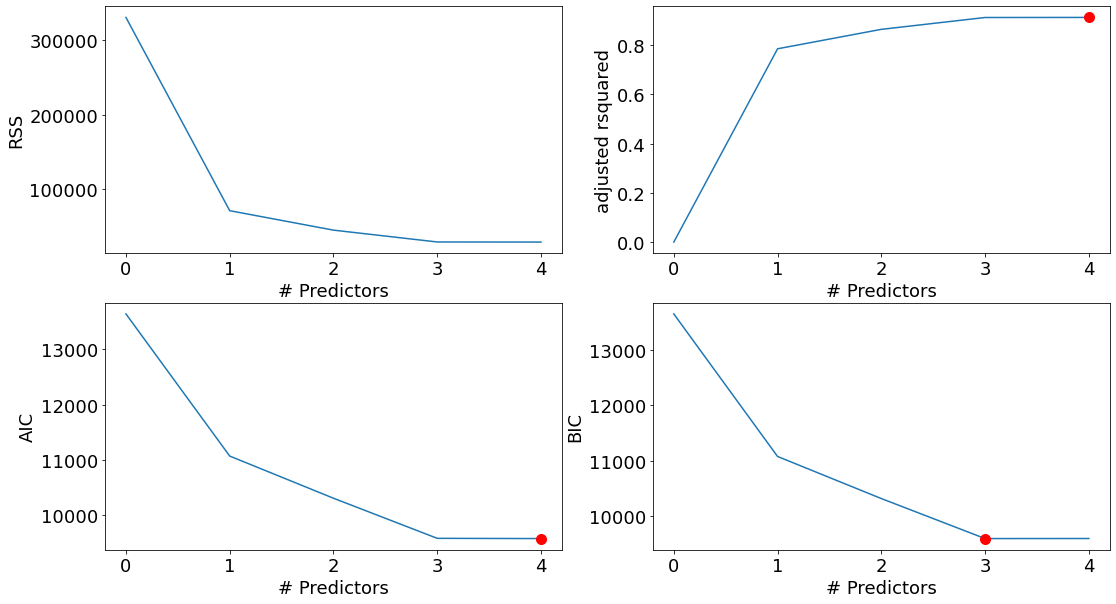

In [35]:
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
plt.subplot(2, 2, 1)

plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

- According to BIC, the best performer is the model with 3 variables.
- According to AIC and adjusted-R2, the best performer is the model with 4 variables.
- We will choose 4 independent variables to build the model